# Import des librairies

In [1]:
# Import lib
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

import datetime

pd.set_option('display.max_columns', None)

# Import des fichiers CSV

In [2]:
# Import csv
#anime = pd.read_csv("csv/anime.csv")
#chars = pd.read_csv("csv/chars.csv")
#chars_traits = pd.read_csv("csv/chars_traits.csv")
#chars_vns = pd.read_csv("csv/chars_vns.csv")
#docs = pd.read_csv("csv/docs.csv")
#image_votes = pd.read_csv("csv/image_votes.csv")
#images = pd.read_csv("csv/images.csv")
#producers = pd.read_csv("csv/producers.csv")
#producers_relations = pd.read_csv("csv/producers_relations.csv")
releases = pd.read_csv("csv/releases.csv", low_memory=False)
releases_lang = pd.read_csv("csv/releases_lang.csv", low_memory=False)
#releases_media = pd.read_csv("csv/releases_media.csv")
#releases_platforms = pd.read_csv("csv/releases_platforms.csv")
#releases_producers = pd.read_csv("csv/releases_producers.csv")
releases_vn = pd.read_csv("csv/releases_vn.csv", low_memory=False)
#rlists = pd.read_csv("csv/rlists.csv")
#staff = pd.read_csv("csv/staff.csv")
#staff_alias = pd.read_csv("csv/staff_alias.csv")
#tags = pd.read_csv("csv/tags.csv")
#tags_aliases = pd.read_csv("csv/tags_aliases.csv")
#tags_parents = pd.read_csv("csv/tags_parents.csv")
#tags_vn = pd.read_csv("csv/tags_vn.csv")
#traits = pd.read_csv("csv/traits.csv")
#traits_parents = pd.read_csv("csv/traits_parents.csv")
#ulist_labels = pd.read_csv("csv/ulist_labels.csv")
#ulist_vns = pd.read_csv("csv/ulist_vns.csv")
#ulist_vns_labels = pd.read_csv("csv/ulist_vns_labels.csv")
#users = pd.read_csv("csv/users.csv")
vn = pd.read_csv("csv/vn.csv", low_memory=False)
#vn_anime = pd.read_csv("csv/vn_anime.csv")
#vn_relations = pd.read_csv("csv/vn_relations.csv")
#vn_screenshots = pd.read_csv("csv/vn_screenshots.csv")
#vn_seiyuu = pd.read_csv("csv/vn_seiyuu.csv")
#vn_staff = pd.read_csv("csv/vn_staff.csv")
#wikidata = pd.read_csv("csv/wikidata.csv")

# Affichage des dataframes utilisés

In [29]:
releases

id                                              title  \
0          1       Minna de Nyan Nyan - DVD-ROM Limited Edition   
1          2              Muv-Luv Alternative - DVD-ROM Edition   
2          3                 Let's Meow Meow! - Package Edition   
3          4          Kana ~Imouto~ First Press Limited Edition   
4          5                                      Kana ~Imouto~   
...      ...                                                ...   
71516  75317                                       Soft Drizzle   
71517  75318                              Soft Drizzle: B-Track   
71518  75319          Toumei Ningen The Game - Download Edition   
71519  75320  OTL (Office True Love) ~Damee, Shigoto Chuu na...   
71520  75321                      Ratten Reich - Dance of Kings   

                                                original      type  \
0                                みんなでニャンニャン DVD-ROM版 限定版  complete   
1                                 マブラヴ　オルタネイティヴ DVD-ROM版  complete   
2                                                    NaN  complete   
3                                         加奈～いもうと～　初回限定版  complete   
4                                              加奈 ～いもうと～  complete   
...                                                  ...       ...   
71516                                                NaN  complete   
71517                                                NaN  complete   
71518                              透明人間 THE GAME ダウンロード版  complete   
71519  オフィストゥルーラブ（OTL） ～だめぇ、仕事ちゅうなのに…絶頂がとまらないのぉ～ Wind...  complete   
71520                                                NaN  complete   

                                                 website catalog  \
0      http://www.cd-bros.co.jp/yamitsu/game/nyannyan...     NaN   
1                     http://www.muvluv.com/alternative/     NaN   
2      https://web.archive.org/web/20090520165941/htt...   GC023   
3                http://www.panther.co.jp/kana/index.htm     NaN   
4                http://www.panther.co.jp/kana/index.htm     NaN   
...                                                  ...     ...   
71516                                                NaN     NaN   
71517                                                NaN     NaN   
71518             http://www.cyon.jp/product/toumei.html     NaN   
71519  http://spielsoft.1000.tv/LoveJuice/pink/otl/in...     NaN   
71520                                                NaN     NaN   

                gtin  released                    notes  minage patch  \
0      4946569500413  20031017                      NaN      18     f   
1      4526563000159  20060224                      NaN      18     f   
2       652823206208  20040817  Currently out of print.      18     f   
3      4988703013816  19990625                      NaN      18     f   
4      4988703013847  20010615                      NaN      18     f   
...              ...       ...                      ...     ...   ...   
71516              0  20200816                      NaN       0     f   
71517              0  20201002                      NaN      -1     f   
71518              0  20080808                      NaN      18     f   
71519              0  20121019                      NaN      18     f   
71520              0  20201026                      NaN      -1     f   

      freeware doujin  voiced  ani_story  ani_ero uncensored     engine  \
0            f      f       0          0        0          f        NaN   
1            f      f       4          3        1          f        NaN   
2            f      f       3          1        1          t  Ikura GDL   
3            f      f       1          1        1          f  Ikura GDL   
4            f      f       1          1        1          f        NaN   
...        ...    ...     ...        ...      ...        ...        ...   
71516        t      t       0          2        0          f      p5.js   
71517        t      t       0          0        0          f      Unit

In [24]:
vn

id                          title    original  \
0          1             Minna de Nyan Nyan  みんなでニャンニャン   
1          2                  Kana ~Imouto~    加奈～いもうと～   
2          3                  Utawarerumono     うたわれるもの   
3          4                        Clannad         NaN   
4          5                Little Busters!   リトルバスターズ！   
...      ...                            ...         ...   
28234  29448                          Fishy         NaN   
28235  29449                  Bound by Lust         NaN   
28236  29450                   Soft Drizzle         NaN   
28237  29451          Soft Drizzle: B-Track         NaN   
28238  29452  Ratten Reich - Dance of Kings         NaN   

                                                   alias  length    image  \
0                                                    NaN       3  cv20339   
1                                     Kana Little Sister       3  cv29271   
2      Uta (うた)\nUta1\nThe One Being Sung\nThe One of...       3  cv21565   
3                                                   クラナド       5  cv24252   
4                            LB!\nリトバス！\nritobasu\nLB-EX       5  cv42017   
...                                                  ...     ...      ...   
28234                                                NaN       0  cv43815   
28235                                                NaN       0  cv43817   
28236                                                NaN       1  cv43823   
28237                                                NaN       1  cv43824   
28238                                                NaN       0  cv43825   

                                                    desc  \
0      A young man named Ibuki is a college student l...   
1      You have a sister by the name of Kana, who is ...   
2      [url=/c411]Hakuoro[/url], a man who wakes up i...   
3      Okazaki Tomoya is a third year high school stu...   
4      Riki was a child when his parents died, leavin...   
...                                                  ...   
28234  You didn't want to go to the aquarium. You don...   
28235  Long time ago, humans and succubi lived in har...   
28236  Soft Drizzle is a short, 64x64 resolution visu...   
28237  Soft Drizzle: B-Track is a short visual novel ...   
28238  Ratten Reich - Dance of Kings is a game set in...   

                         l_wp       l_encubed  l_renai  c_popularity  \
0                         NaN             NaN      NaN      0.045386   
1         Kana:_Little_Sister             NaN      NaN      0.152497   
2               Utawarerumono   utawarerumono      NaN      0.342302   
3      Clannad_(visual_novel)         clannad  clannad      0.642559   
4             Little_Busters!  little-busters      NaN      0.584464   
...                       ...             ...      ...           ...   
28234                     NaN             NaN      NaN           NaN   
28235                     NaN             NaN      NaN           NaN   
28236                     NaN             NaN      NaN           NaN   
28237                     NaN             NaN      NaN           NaN   
28238                     NaN             NaN      NaN           NaN   

       c_rating  c_votecount  l_wikidata  
0       58.1263          629         NaN  
1       74.1700         1557   1274585.0  
2       78.5697         3386    773981.0  
3       86.5650         6846    110607.0  
4       85.6902         5949    683502.0  
...         ...          ...         ...  
28234    0.0000            0         NaN  
28235    0.0000            0         NaN  
28236    0.0000            0         NaN  
28237    0.0000            0         NaN  
28238    0.0000            0         NaN  

[28239 rows x 14 columns]

In [26]:
# id  = releases id
# vid = vn id
releases_vn

id    vid
0          1      1
1          2     92
2          3      1
3          4      2
4          5      2
...      ...    ...
77247  75317  29450
77248  75318  29451
77249  75319   1264
77250  75320  10219
77251  75321  29452

[77252 rows x 2 columns]

In [27]:
# id = releases id
releases_lang

id lang
0          1   ja
1          2   ja
2          3   en
3          4   ja
4          5   ja
...      ...  ...
76178  75321   de
76179  75321   en
76180  75321   it
76181  75321   pl
76182  75321   ru

[76183 rows x 2 columns]

# Détails des différents CSV
releases:
name of all releases existing (one visual novel can be release multiples times)

releases_vn:
table with releases_id and vn_id

releases_lang:
language of the release

vn:
all existing visual novel

# Analyse des données

## Data cleaning and data wrangling

### Méthodes utilisées pour le nettoyage des dataframes

In [3]:
def convert2Bool(value):
    """
    This method is to be used with the apply method of pandas Series.
    It convert all 't' into 0 and everything else to 1.

    value -- value of the change
    """
    if value == 't':
        return 1
    else:
        return 0

def convertValue2Bool(value):
    if value == 0:
        return 1
    else:
        return 0

# Convert released column into three columns (year, month, day)
def transformReleasedToYYMMDD(column):
    years = []
    months = []
    days = []

    for i in range(len(column)):
        value = str(column[i])

        year = int(value[:4])
        if (year == 9999):
            year = 'unknow'

        month = int(value[4:6])
        if month == 99:
            month = 'unknow'

        day = int(value[6:])
        if day == 99:
            day = 'unknow'

        years.append(year)
        months.append(month)
        days.append(day)

    return years, months, days

# The execution of this method is long
def fill_lang(df_release, df_lang):
    df = df_release.copy()
    df['lang'] = df.lang.astype('str')

    for i, row in df_lang.iterrows():
        try:
            df.at[row.id, 'lang'] = row.lang
        except KeyError: # id not in dataframe
            pass

    return df

def fill_popularity(release_df, df_vn, df_relation):
    df = release_df.copy()
    df['c_popularity'] = -1

    for ind in df_relation.index: 
        vid = df_relation['vid'][ind]
        id = df_relation['id'][ind]
        new_popularity = df_vn[df_vn['id'] == vid]['c_popularity'].to_list()[0]
        df.loc[df['id'] == id, ['c_popularity']] = new_popularity

    return df

def add_column_to_df(df_dst, df_src, df_relation, column_names):
    df = df_dst.copy()
    df['c_popularity'] = -1

    for ind in df_relation.index: 
        vid = df_relation['vid'][ind]
        id = df_relation['id'][ind]
        
        for name in column_names:
            new_value = df_src[df_vn['id'] == vid][name].to_list()[0]
            df.loc[df['id'] == id, [name]] = new_value

    return df

## Data utilisée

In [145]:
# Copy of the releases dataset
dataset_releases = releases

# Dropping unneeded columns
dataset_releases = dataset_releases.drop(columns=['website', 'catalog', 'gtin', 'notes',
                                                  'id', 'l_dlsite', 'l_gog', 'title',
                                                  'l_getchudl', 'l_denpa', 'l_gyutto', 'l_dmm',
                                                  'l_dlsiteen', 'original', 'minage', 'l_jastusa',
                                                  'l_itch', 'l_egs', 'l_erotrail', 'l_jlist',
                                                  'l_gamejolt', 'l_nutaku', 'reso_x', 'reso_y'])

# Add foreign column (lang and c_popularity) and fill then with 'undefined'
dataset_releases['lang'] = "undefined"

# Convert 't' and 'f' to numerical value of the following columns
dataset_releases.patch = dataset_releases.patch.apply(convert2Bool)
dataset_releases.freeware = dataset_releases.freeware.apply(convert2Bool)
dataset_releases.doujin = dataset_releases.doujin.apply(convert2Bool)
dataset_releases.uncensored = dataset_releases.uncensored.apply(convert2Bool)

# Convert seller columns to boolean
dataset_releases.l_melon = dataset_releases.l_melon.apply(convertValue2Bool)
dataset_releases.l_steam = dataset_releases.l_steam.apply(convertValue2Bool)
dataset_releases.l_digiket = dataset_releases.l_digiket.apply(convertValue2Bool)
dataset_releases.l_mg = dataset_releases.l_mg.apply(convertValue2Bool)
dataset_releases.l_getchu = dataset_releases.l_getchu.apply(convertValue2Bool)
dataset_releases.l_toranoana = dataset_releases.l_toranoana.apply(convertValue2Bool)
dataset_releases.l_melonjp = dataset_releases.l_melonjp.apply(convertValue2Bool)

# Date not used because these three features predictif power is too high
# Get three columns out of released column
year, month, day = transformReleasedToYYMMDD(dataset_releases.released)
dataset_releases['year'], dataset_releases['month'], dataset_releases['day'] = year, month, day
# Removing unknow value
#dataset_releases = dataset_releases[dataset_releases.year != 'unknow']
dataset_releases = dataset_releases.drop(columns=['year', 'day'])
dataset_releases = dataset_releases[dataset_releases.month != 'unknow']
#dataset_releases = dataset_releases[dataset_releases.day != 'unknow']

# Remove released column
dataset_releases = dataset_releases.drop(columns=['released'])

# Encoding str column to numerical value
le = LabelEncoder()
dataset_releases.type = le.fit_transform(dataset_releases['type'])
dataset_releases.engine = dataset_releases.engine.apply(str) # Convert all value to str
dataset_releases.engine = le.fit_transform(dataset_releases['engine'])

# Filling lang column
dataset_releases = fill_lang(dataset_releases, releases_lang)
dataset_releases.lang = le.fit_transform(dataset_releases['lang'])

# Filling c_popularity column
# Fill dataset with right popularity
dataset_releases['c_popularity'] = fill_popularity(releases, vn, releases_vn).c_popularity 
dataset_releases = dataset_releases.dropna() # Removing NaN
dataset_releases = dataset_releases[dataset_releases.c_popularity != -1] # Removing rows with default value
dataset_releases.c_popularity = dataset_releases.c_popularity * 100 # Convert to percentage
dataset_releases.c_popularity = dataset_releases.c_popularity.astype(int) # Convert to int
dataset_releases = dataset_releases[dataset_releases.c_popularity != 0] # Removing vn with a popularity of 0

# Convert all numerical value to int to avoid MemoryError
# Tuto
# https://medium.com/@aakashgoel12/avoid-memory-error-techniques-to-reduce-dataframe-memory-usage-fcf53b2318a2
dataset_releases = dataset_releases.astype(np.uint8)

# Print dataset
dataset_releases.head()

type  patch  freeware  doujin  voiced  ani_story  ani_ero  uncensored  \
0     0      0         0       0       0          0        0           0   
1     0      0         0       0       4          3        1           0   
2     0      0         0       0       3          1        1           1   
3     0      0         0       0       1          1        1           0   
4     0      0         0       0       1          1        1           0   

   engine  l_steam  l_digiket  l_melon  l_mg  l_getchu  l_toranoana  \
0     178        1          1        1     1         1            1   
1     178        1          1        1     1         1            1   
2      74        1          1        1     1         1            1   
3      74        1          1        1     1         1            1   
4     178        1          1        1     1         0            1   

   l_melonjp  lang  month  c_popularity  
0          1    37     10             4  
1          1    17      2            65  
2          1    17      8             4  
3          1     6      6            15  
4          1    17      6            15

Temps de création du dataset : 4 min

In [144]:
#Check if everything is good, title column is needed
test = dataset_releases.copy()
test[test['title'].str.contains('Muv-Luv')==True]

title  type  patch  \
1                  Muv-Luv Alternative - DVD-ROM Edition   0.0    0.0   
5                   Muv-Luv Alternative - CD-ROM Edition   0.0    0.0   
6                 Muv-Luv Alternative - All Ages Edition   0.0    0.0   
7                                                Muv-Luv   0.0    0.0   
8                              Muv-Luv - DVD-ROM Edition   0.0    0.0   
...                                                  ...   ...    ...   
54831             Muv-Luv Alternative - Physical Edition   0.0    0.0   
62308  Muv-Luv Alternative - Windows 7 Support Downlo...   0.0    0.0   
62309  Muv-Luv & Muv-Luv Alternative Windows 7 Suppor...   0.0    0.0   
62561  Muv-Luv Alternative - Restrictions Lifted Edition   0.0    0.0   
62562              Muv-Luv - Restrictions Lifted Edition   0.0    0.0   

       freeware  doujin  voiced  ani_story  ani_ero  uncensored  engine  \
1           0.0     0.0     4.0        3.0      1.0         0.0   178.0   
5           0.0     0.0     4.0        3.0      1.0         0.0   178.0   
6           0.0     0.0     4.0        3.0      0.0         0.0   178.0   
7           0.0     0.0     4.0        2.0      1.0         0.0   178.0   
8           0.0     0.0     4.0        2.0      1.0         0.0   178.0   
...         ...     ...     ...        ...      ...         ...     ...   
54831       0.0     0.0     4.0        3.0      0.0         0.0     9.0   
62308       0.0     0.0     4.0        3.0      1.0         0.0   178.0   
62309       0.0     0.0     4.0        3.0      1.0         0.0   178.0   
62561       0.0     0.0     4.0        3.0      1.0         0.0   178.0   
62562       0.0     0.0     4.0        3.0      1.0         0.0   178.0   

       l_steam  l_digiket  l_melon  l_mg  l_getchu  l_toranoana  l_melonjp  \
1          1.0        1.0      1.0   1.0       1.0          1.0        1.0   
5          1.0        1.0      1.0   1.0       1.0          1.0        1.0   
6          1.0        1.0      1.0   1.0       1.0          1.0        1.0   
7          1.0        1.0      1.0   1.0       1.0          1.0        1.0   
8          1.0        1.0      1.0   1.0       1.0          1.0        1.0   
...        ...        ...      ...   ...       ...          ...        ...   
54831      1.0        1.0      1.0   1.0       1.0          1.0        1.0   
62308      1.0        1.0      1.0   1.0       1.0          1.0        1.0   
62309      1.0        1.0      1.0   1.0       1.0          1.0        1.0   
62561      1.0        1.0      1.0   1.0       1.0          1.0        1.0   
62562      1.0        1.0      1.0   1.0       1.0          1.0        1.0   

       lang month  c_popularity  
1        17     2            65  
5        17     3            65  
6        17     9            65  
7        17     2            42  
8        17     4            42  
...     ...   ...           ...  
54831    37     7            65  
62308    39     2            65  
62309    39     5            42  
62561     6     2            65  
62562     6     2            42  

[70 rows x 20 columns]

In [ ]:
# Export cleaned dataset to a CSV file
dataset_releases.to_csv(r'F:\Cours\M2\Machine Learning\Projet\vndb\csv\__cleaned.csv', index = False, header=True)

## Data non labelisée

In [4]:
# Unlabelised data
# Copy of the releases dataset
dataset_unlabelised = releases.copy()

# Add foreign column (lang and c_popularity) and fill then with 'undefined'
dataset_unlabelised['lang'] = "undefined"
dataset_unlabelised = fill_lang(dataset_unlabelised, releases_lang)

# Filling c_popularity column
# Fill dataset with right popularity
dataset_unlabelised['c_popularity'] = fill_popularity(releases, vn, releases_vn).c_popularity 

# Print dataset
dataset_unlabelised.head()

id                                         title                 original  \
0  1.0  Minna de Nyan Nyan - DVD-ROM Limited Edition  みんなでニャンニャン DVD-ROM版 限定版   
1  2.0         Muv-Luv Alternative - DVD-ROM Edition   マブラヴ　オルタネイティヴ DVD-ROM版   
2  3.0            Let's Meow Meow! - Package Edition                      NaN   
3  4.0     Kana ~Imouto~ First Press Limited Edition           加奈～いもうと～　初回限定版   
4  5.0                                 Kana ~Imouto~                加奈 ～いもうと～   

       type                                            website catalog  \
0  complete  http://www.cd-bros.co.jp/yamitsu/game/nyannyan...     NaN   
1  complete                 http://www.muvluv.com/alternative/     NaN   
2  complete  https://web.archive.org/web/20090520165941/htt...   GC023   
3  complete            http://www.panther.co.jp/kana/index.htm     NaN   
4  complete            http://www.panther.co.jp/kana/index.htm     NaN   

           gtin    released                    notes  minage patch freeware  \
0  4.946570e+12  20031017.0                      NaN    18.0     f        f   
1  4.526563e+12  20060224.0                      NaN    18.0     f        f   
2  6.528232e+11  20040817.0  Currently out of print.    18.0     f        f   
3  4.988703e+12  19990625.0                      NaN    18.0     f        f   
4  4.988703e+12  20010615.0                      NaN    18.0     f        f   

  doujin  voiced  ani_story  ani_ero uncensored     engine  l_steam l_dlsite  \
0      f     0.0        0.0      0.0          f        NaN      0.0      NaN   
1      f     4.0        3.0      1.0          f        NaN      0.0      NaN   
2      f     3.0        1.0      1.0          t  Ikura GDL      0.0      NaN   
3      f     1.0        1.0      1.0          f  Ikura GDL      0.0      NaN   
4      f     1.0        1.0      1.0          f        NaN      0.0      NaN   

  l_dlsiteen l_gog l_denpa l_jlist l_gyutto  l_digiket  l_melon  l_mg  \
0        NaN   NaN     NaN     NaN       {}        0.0      0.0   0.0   
1        NaN   NaN     NaN     NaN       {}        0.0      0.0   0.0   
2        NaN   NaN     NaN     NaN       {}        0.0      0.0   0.0   
3        NaN   NaN     NaN     NaN       {}        0.0      0.0   0.0   
4        NaN   NaN     NaN     NaN       {}        0.0      0.0   0.0   

   l_getchu  l_getchudl l_dmm l_itch l_jastusa   l_egs  l_erotrail  \
0       0.0         0.0    {}    NaN       NaN  3048.0         0.0   
1       0.0         0.0    {}    NaN       NaN     0.0         0.0   
2       0.0         0.0    {}    NaN       NaN     0.0         0.0   
3       0.0         0.0    {}    NaN       NaN     0.0         0.0   
4   12403.0         0.0    {}    NaN       NaN   182.0      4348.0   

   l_toranoana  l_melonjp  l_gamejolt l_nutaku  reso_x  reso_y       lang  \
0          0.0        0.0         0.0      NaN   640.0   480.0  undefined   
1          0.0        0.0         0.0      NaN  1024.0   600.0         ja   
2          0.0        0.0         0.0      NaN   640.0   480.0         ja   
3          0.0        0.0         0.0      NaN     0.0     0.0         en   
4          0.0        0.0         0.0      NaN     0.0     0.0         ja   

   c_popularity  
0      0.045386  
1      0.653956  
2      0.045386  
3      0.152497  
4      0.152497

In [5]:
# Export unlabelised dataset to a CSV file
dataset_unlabelised.to_csv(r'F:\Cours\M2\Machine Learning\Projet\vndb\csv\__unlabelised.csv', index = False, header=True)

In [54]:
# Counting the number of 0 in each column to know wich sellers to drop
(dataset_releases == 0).astype(int).sum()

type           60984
patch          66939
freeware       51974
doujin         49249
voiced         30680
ani_story      47768
ani_ero        56507
uncensored     69241
engine             6
l_steam         2580
l_digiket       4003
l_melon           64
l_mg             268
l_getchu        2532
l_toranoana      260
l_melonjp        326
lang           71521
year               0
month              0
day                0
dtype: int64

# Isolation de la target

In [28]:
target_name = 'c_popularity'
Y = dataset_releases[target_name]
X = dataset_releases.drop(target_name, axis='columns')

# Entrainement du model

In [29]:
# Splitting model between training and test datas
from sklearn.model_selection import train_test_split as TTS
X_tr, X_te, Y_tr, Y_te = TTS(X, Y, random_state=97)

In [30]:
# Accuracy function
accuracy = lambda p, t: (p == t).sum() / t.shape[0]

## PCA

In [31]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_tr)

# Transformer le PCA
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

pca.fit(X_tr_PCA)

PCA(n_components=6)

Text(0.5, 1.0, 'Graphe pour choisir le nombre de PC')

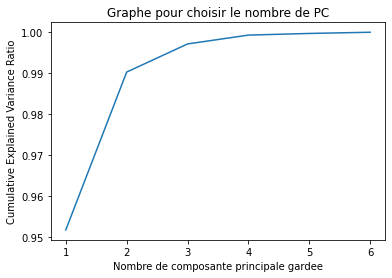

In [56]:
import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([i for i in range(1, len(cumsum) + 1)], cumsum)
plt.xlabel('Nombre de composante principale gardee')
plt.ylabel('Cumulative Explained Variance Ratio') # Ratio d'Informations (==variance) Conservees
plt.title('Graphe pour choisir le nombre de PC')

## RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.pipeline import Pipeline
# Pipeline
pipeline_details = [('RF', RF())]
pipeline = Pipeline(steps=pipeline_details)

from sklearn.model_selection import GridSearchCV
# Hyper parameters
hyperparameters = {}
hyperparameters['RF__n_estimators']  = [i for i in range(80, 120 +1, 10)]
hyperparameters['RF__criterion']  = ['gini', 'entropy']
hyperparameters['RF__max_depth']  = [i for i in range(1, 11)]
hyperparameter_search = GridSearchCV(pipeline, hyperparameters, scoring='accuracy', cv=3)
hyperparameter_search.fit(X_tr, Y_tr)
print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

# RF
rfNEstimators = hyperparameter_search.best_params_['RF__n_estimators']
rfCriterion = hyperparameter_search.best_params_['RF__criterion']
rfMaxDepth = hyperparameter_search.best_params_['RF__max_depth']
rf = RF(n_estimators = rfNEstimators, criterion = rfCriterion, max_depth = rfMaxDepth)
rf.fit(X_tr_PCA, Y_tr);

train_preds = rf.predict(X_tr_PCA)
train_proba = rf.predict_proba(X_tr_PCA)
print('RandomForestAccuracy : {}'.format(accuracy(train_preds, Y_tr)))

Meilleur score : 0.40283
Meilleur paramètres : {'RF__criterion': 'entropy', 'RF__max_depth': 10, 'RF__n_estimators': 110}
RandomForestAccuracy : 0.5289991107598063


Temps de compilation : 2 min

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
# Pipeline
pipeline_details = [('KNN', KNN())]
pipeline = Pipeline(steps=pipeline_details)

from sklearn.model_selection import GridSearchCV
# Hyper parameters
hyperparameters = {}
hyperparameters['KNN__n_neighbors'] = [1, 3, 5, 7, 11, 13]
hyperparameters['KNN__weights'] = ['uniform', 'distance']
hyperparameters['KNN__algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameter_search = GridSearchCV(pipeline, hyperparameters, scoring='accuracy', cv=3)
hyperparameter_search.fit(X_tr, Y_tr)
print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

# KNN
knnNNeighbors = hyperparameter_search.best_params_['KNN__n_neighbors']
knnWeights = hyperparameter_search.best_params_['KNN__weights']
knnAlgorithm = hyperparameter_search.best_params_['KNN__algorithm']
knn = KNN(n_neighbors = knnNNeighbors, weights = knnWeights, algorithm = knnAlgorithm)
knn.fit(X_tr_PCA, Y_tr);

train_preds = knn.predict(X_tr_PCA)
print('KNearestNeighborsAccuracy : {}'.format(accuracy(train_preds, Y_tr)))

In [14]:
# Without Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()
knn.fit(X_tr_PCA, Y_tr);

train_preds = knn.predict(X_tr_PCA)
print('KNearestNeighborsAccuracy : {}'.format(accuracy(train_preds, Y_tr)))

KNearestNeighborsAccuracy : 0.44323683430491057


# SVC

In [ ]:
from sklearn.svm import SVC
# Pipeline
pipeline_details = [('SVC', SVC())]
pipeline = Pipeline(steps=pipeline_details)

from sklearn.model_selection import GridSearchCV
# Hyper parameters
hyperparameters = {}
hyperparameters['SVC__degree'] = [i for i in range(1, 11)]
hyperparameters['SVC__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid'] # precomputed can only be used with a square matrix
hyperparameters['SVC__C'] = np.arange(1.0, 7.0)
hyperparameter_search = GridSearchCV(pipeline, hyperparameters, scoring='accuracy', cv=3)
hyperparameter_search.fit(X_tr, Y_tr)
print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

# SVC
svcDegree = hyperparameter_search.best_params_['SVC__degree']
scvKernel = hyperparameter_search.best_params_['SVC__kernel']
scvC = hyperparameter_search.best_params_['SVC__C']
svc = SVC(C = scvC, kernel = scvKernel, degree = svcDegree)
svc.fit(X_tr_PCA, Y_tr);

train_preds = svc.predict(X_tr_PCA)
print('SVCAccuracy : {}'.format(accuracy(train_preds, Y_tr)))

In [13]:
# Without Pipeline
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_tr_PCA, Y_tr);

train_preds = svc.predict(X_tr_PCA)
print('SVCAccuracy : {}'.format(accuracy(train_preds, Y_tr)))

SVCAccuracy : 0.38869676909396306


Aucun résultat obtenu après 2h de compilation

# Importance des features (RandomForest)

In [10]:
# Training model again to get the importances of all features
rf.fit(X_tr, Y_tr)
importances = rf.feature_importances_
importances

array([6.70775270e-02, 3.31569472e-02, 4.45257207e-02, 3.60989427e-02,
       9.82242616e-02, 1.22630591e-01, 6.42220573e-02, 3.70417923e-02,
       1.50050596e-01, 1.99717973e-02, 9.14372973e-03, 2.36846496e-05,
       1.28707301e-02, 1.25592317e-02, 1.64123988e-03, 2.61374475e-03,
       9.73057051e-02, 1.90841700e-01])

Somme des pouvoirs predictif : 1.0
L'échelle du pouvoir prédictif est en %


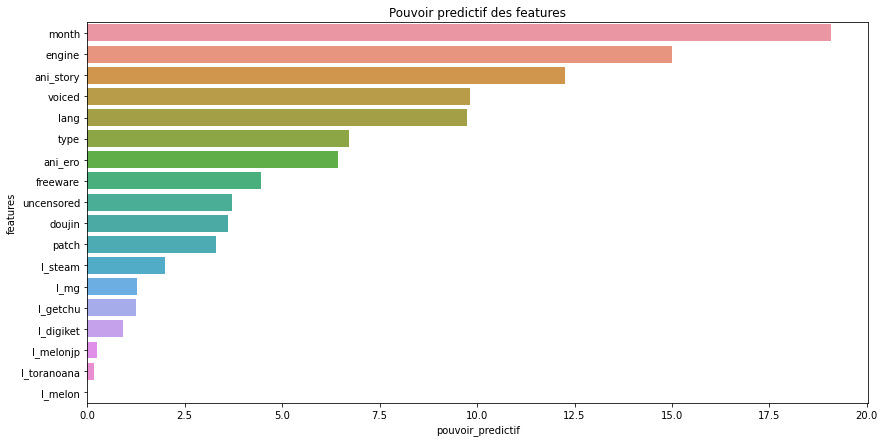

In [11]:
# Drawing barplot to better show which features is the most important for the model
plt.figure(figsize=(14,7))

d = pd.DataFrame()
d['features'] = X_tr.columns
d['pouvoir_predictif'] = importances
print('Somme des pouvoirs predictif : {}'.format(d['pouvoir_predictif'].sum()))
d['pouvoir_predictif'] = d['pouvoir_predictif'].apply(lambda v : v*100)
d = d.sort_values(by='pouvoir_predictif', ascending=False)
sns.barplot(d['pouvoir_predictif'], d['features']).set_title('Pouvoir predictif des features');
print("L'échelle du pouvoir prédictif est en %")

# Matrice de confusion

Matrice de confusion :


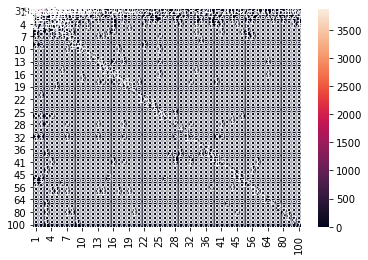

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def show_cm(cm, labels):
    print("Matrice de confusion :")
    df = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df, annot=True)
    plt.show()

classes = Y.astype('category').cat.categories.tolist()
cm = confusion_matrix(train_preds, Y_tr, labels=classes)
show_cm(cm, classes)

La matrice de confusion n'est pas lisible car il y a trop de target possible

# Courbe ROC

52


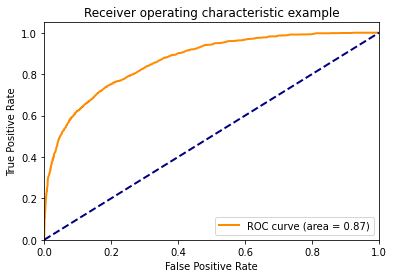

In [141]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

classes = Y.astype('category').cat.categories.tolist()
n_classes = len(classes)
n_classes = Y.nunique()
print(n_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
pos = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_tr, train_proba[:, i], pos_label = pos)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_tr.ravel(), train_proba[:, i].ravel(), pos_label = pos)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

La courbe ROC est assez éloigné de la courbe aléatoire et l'air sous la courbe est égale à 87%.

Cela signifie qu'il y a beaucoup de valeur vrai-positives.

# Analyse donnée

In [19]:
# data report
from pandas_profiling import ProfileReport
# Module needed
# pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

profile = ProfileReport(dataset_releases, title="Visual Novel Database dataset report", html={'style' : {'full_width': True}})
profile.to_notebook_iframe()
profile.to_file(output_file="report/vndb_report.html")

In [19]:
# Converting float64 to float16 to avoir MemoryError
for column in dataset_unlabelised.columns:
    try:
        dataset_unlabelised[column] = dataset_unlabelised[column].astype('float16')
    except:
        pass

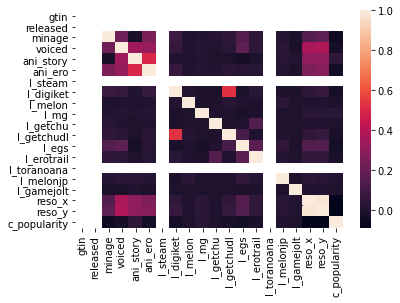

In [26]:
import matplotlib.pyplot as plt
cor = dataset_unlabelised.drop(columns=['id', 'title', 'original']).corr()
sns.heatmap(cor)
plt.show()

In [21]:
# Unlabelised data report
from pandas_profiling import ProfileReport

profile = ProfileReport(dataset_unlabelised.drop(columns=['id', 'title', 'original']), title="Visual Novel Database unlabelised dataset report", html={'style' : {'full_width': True}})
profile.to_notebook_iframe()
profile.to_file(output_file="report/vndb_unlabelised_report.html")

MemoryError: Unable to allocate 70.6 MiB for an array with shape (75197, 41, 3) and data type float64

In [148]:
# Checking columns to identify the target
print("len of popularity: ", len(vn.c_popularity.value_counts()))
print("len of rating: ", len(vn.c_rating.value_counts()))
print("len of votecount: ", len(vn.c_votecount.value_counts()))

len of popularity:  16317
len of rating:  8799
len of votecount:  697


La colonne 'popularity' va être utilisé en temps que target car elle contient le plus grand nombre de valeurs.

Elle nous permettra ainsi de conserver un plus grand nombre de lignes dans notre dataset.